# Airbnb data exploration

*With the guide from https://www.kaggle.com/davidgasquez/airbnb-recruiting-new-user-bookings/user-data-exploration/notebook*


Import necessary stuffs.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Allow matplot to display via notebook
%matplotlib inline

# Set figure aesthetics
sns.set_style("white", {'ytick.major.size': 10.0})
sns.set_context("poster", font_scale=1.1)

## 1. Loading data
Load data **train_users** and **test_users**, and check its basic properties

In [2]:
# Load the data into DataFrames
train_users = pd.read_csv('./data/train_users_2.csv')
test_users = pd.read_csv('./data/test_users.csv')

# Print total user from dataframe.shape[rows,cols]
print("Loaded", train_users.shape[0], "train users and", test_users.shape[0], "users.")

print("====[ Train users have", len(train_users.columns.values.tolist()), "columns ]====\n",\
      train_users.columns.values.tolist(),"\n")

print("====[ Test users have", len(test_users.columns.values.tolist()), "columns ]====\n",\
      test_users.columns.values.tolist(),"\n")

print("Different column is ###", set(train_users.columns.values.tolist()) - set(test_users.columns.values.tolist()), "###")

Loaded 213451 train users and 62096 users.
====[ Train users have 16 columns ]====
 ['id', 'date_account_created', 'timestamp_first_active', 'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser', 'country_destination'] 

====[ Test users have 15 columns ]====
 ['id', 'date_account_created', 'timestamp_first_active', 'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser'] 

Different column is ### {'country_destination'} ###


## 2. Merging data
Merge **train_users** and **test_users** into **users**

**But the field 'country_destination' will be 'NaN' for the 'test_users' field.**

In [3]:
# Merge train and test users
#users = train_users
users = pd.concat((train_users, test_users), axis=0, ignore_index=True)

# Print total user from dataframe.shape[rows,cols]
print("Merged into", users.shape[0], "users.")

Merged into 275547 users.


### Display users [0-4]

In [4]:
users.head(5)

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,-unknown-,gxn3p5htnn,en,Web,0,facebook,20090319043255
1,seo,google,38,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,20090523174809
2,direct,direct,56,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,20090609231247
3,direct,direct,42,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,20091031060129
4,direct,direct,41,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,-unknown-,87mebub9p4,en,Web,0,basic,20091208061105


## 3. Data *pre-processing* and *exploring*
### Replace a gender '-unknown-' with NaN

In [5]:
users['gender'].replace('-unknown-', np.nan,inplace=True)

In [6]:
users.head(5)

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,NaN,gxn3p5htnn,en,Web,0,facebook,20090319043255
1,seo,google,38,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,20090523174809
2,direct,direct,56,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,20090609231247
3,direct,direct,42,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,20091031060129
4,direct,direct,41,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,NaN,87mebub9p4,en,Web,0,basic,20091208061105


## Counting how many percent of the *missing* data.

**Note**
*country_destination* is known as all Nan from the test_users.

In [7]:
users_nan = (users.isnull().sum() / users.shape[0]) * 100

# This is to calculate the percentage of null/NaN within the data
# .count() tell how much non-null/NaN
# .isnull().sum() tell how much null/NaN
users_nan[users_nan > 0].drop('country_destination')

age                        42.412365
date_first_booking         67.733998
first_affiliate_tracked     2.208335
gender                     46.990169
dtype: float64

## Treating data as they are

Ref: http://pandas.pydata.org/pandas-docs/stable/categorical.html

The lexical order of a variable is not the same as the logical order (“one”, “two”, “three”). By converting to a categorical and specifying an order on the categories, sorting and min/max will use the logical order instead of the lexical order.

**timestamp_first_active** will be transformed into date-time as **date_first_active**

In [8]:
# Category type
categorical_features = [
    'affiliate_channel',
    'affiliate_provider',
    'country_destination',
    'first_affiliate_tracked',
    'first_browser',
    'first_device_type',
    'gender',
    'language',
    'signup_app',
    'signup_method'
]

for categorical_feature in categorical_features:
    users[categorical_feature] = users[categorical_feature].astype('category')

# Date-time type
users['date_account_created'] = pd.to_datetime(users['date_account_created'])
users['date_first_booking'] = pd.to_datetime(users['date_first_booking'])
users['date_first_active'] = pd.to_datetime((users['timestamp_first_active'] // 1000000), format='%Y%m%d')

# Do it also for train and test user
train_users['date_account_created'] = pd.to_datetime(train_users['date_account_created'])
train_users['date_first_booking'] = pd.to_datetime(train_users['date_first_booking'])
train_users['date_first_active'] = pd.to_datetime((train_users['timestamp_first_active'] // 1000000), format='%Y%m%d')
test_users['date_account_created'] = pd.to_datetime(test_users['date_account_created'])
test_users['date_first_booking'] = pd.to_datetime(test_users['date_first_booking'])
test_users['date_first_active'] = pd.to_datetime((test_users['timestamp_first_active'] // 1000000), format='%Y%m%d')

## ======================== [ age ] ========================

*Using dataframe.describe() to see roughly what happen to the data*

In [9]:
users['age'].describe()

count    158681.000000
mean         47.145310
std         142.629468
min           1.000000
25%          28.000000
50%          33.000000
75%          42.000000
max        2014.000000
Name: age, dtype: float64

So, we see some error in the data.

e.g. **age == 1** and **age == 2014**

So, take a look more with age histogram..

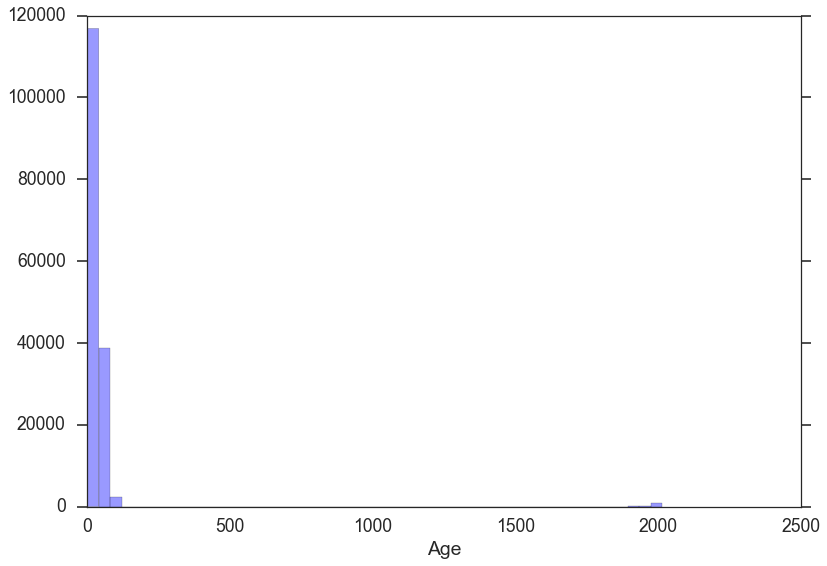

In [10]:
sns.distplot(users['age'].dropna(), kde=False, color="b")
plt.xlabel('Age')

plt.show()

### Replacing age noise with NaN
As Airbnb allow 18+ and very old people like 100+ might be fault inputs.

In [11]:
users['age'][users['age'] < 18].describe()

count    188.000000
mean      12.718085
std        5.764569
min        1.000000
25%        5.000000
50%       16.000000
75%       17.000000
max       17.000000
Name: age, dtype: float64

In [12]:
users['age'][users['age'] > 100].describe()

count    2690.000000
mean      690.957249
std       877.927570
min       101.000000
25%       105.000000
50%       105.000000
75%      2014.000000
max      2014.000000
Name: age, dtype: float64

### Replace it with NaN and show histogram again

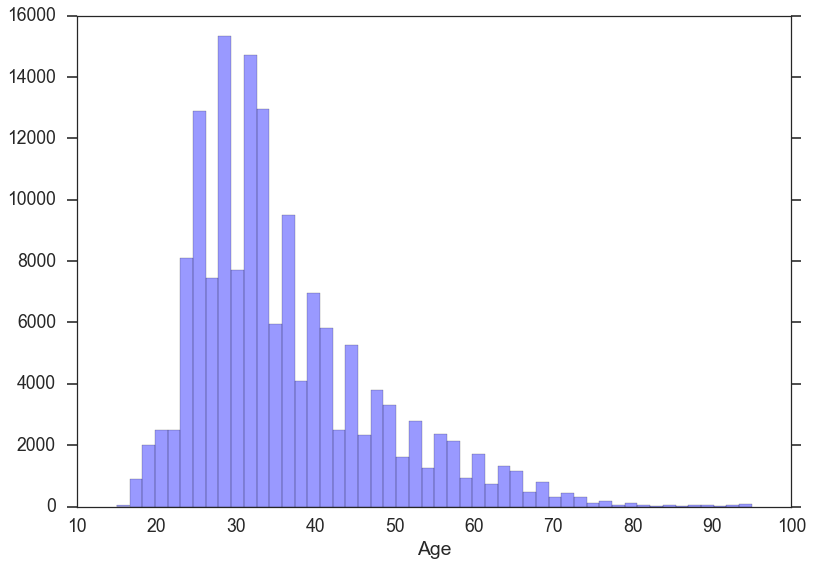

In [13]:
# Replace it with NaN
users.loc[users['age'] > 95, 'age'] = np.nan
users.loc[users['age'] < 13, 'age'] = np.nan

# Plot
sns.distplot(users['age'].dropna(), kde=False, color="b")
plt.xlabel('Age')

plt.show()

In [14]:
print("The users with age around", int(users['age'].mean()), "are quite popular in airbnb")

The users with age around 36 are quite popular in airbnb


## KNOWLEDGE
Age ~36 is peak for Airbnb

**-END**

## ======================== gender ========================

In [15]:
print("Total female user:", users['gender'][users['gender'] == 'FEMALE'].count())
print("Total male user:", users['gender'][users['gender'] == 'MALE'].count())

Total female user: 77524
Total male user: 68209


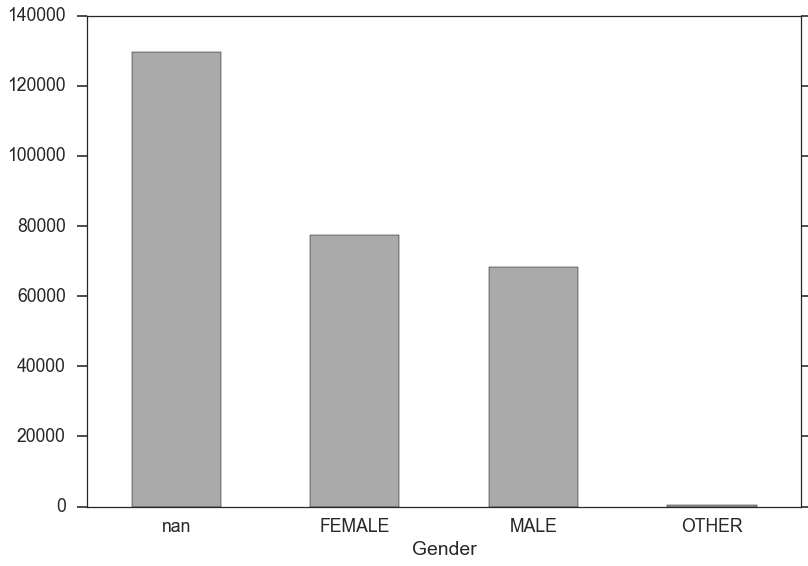

In [16]:
(users['gender'].value_counts(dropna=False)).plot(kind='bar', color='#AAAAAA', rot=0)
plt.xlabel('Gender')

plt.show()

## KNOWLEDGE
Female seemed to use Airbnb more than male

**-END**

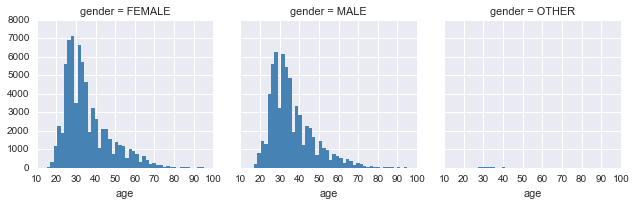

In [17]:
sns.set(style="darkgrid")
g = sns.FacetGrid(users, dropna=False, col="gender", margin_titles=True)
bins = np.linspace(10, 95, 50)
g.map(plt.hist, "age", color="steelblue", bins=bins, lw=0)

plt.show()

## ======================== country ========================

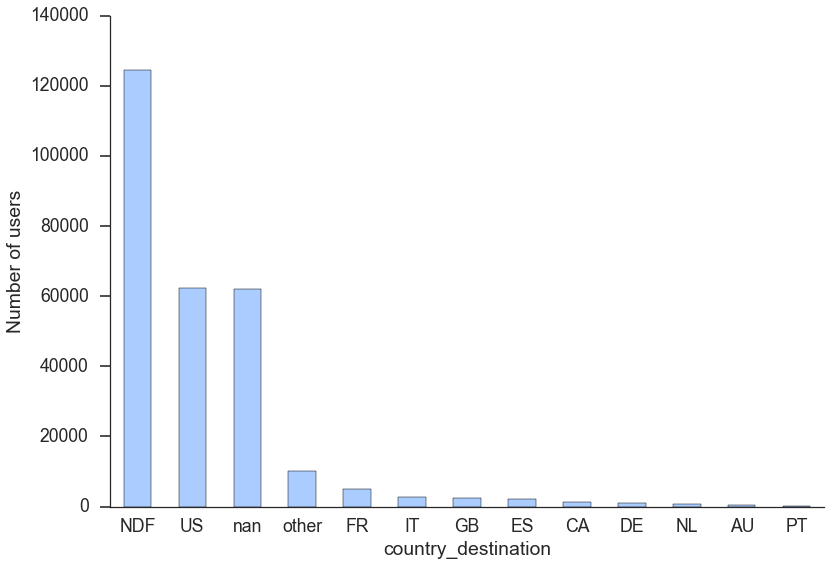

In [18]:
country_total = users['country_destination'].value_counts(dropna=False)

sns.set_style("white", {'ytick.major.size': 10.0})
sns.set_context("poster", font_scale=1.1)

country_total.plot(kind='bar', color='#AACCFF', rot=0)
plt.xlabel('country_destination')
plt.ylabel('Number of users')

sns.despine()
plt.show()

## KNOWLEDGE
With Airbnb, a lot people go to US

**-END**

## Absolute gender percentage

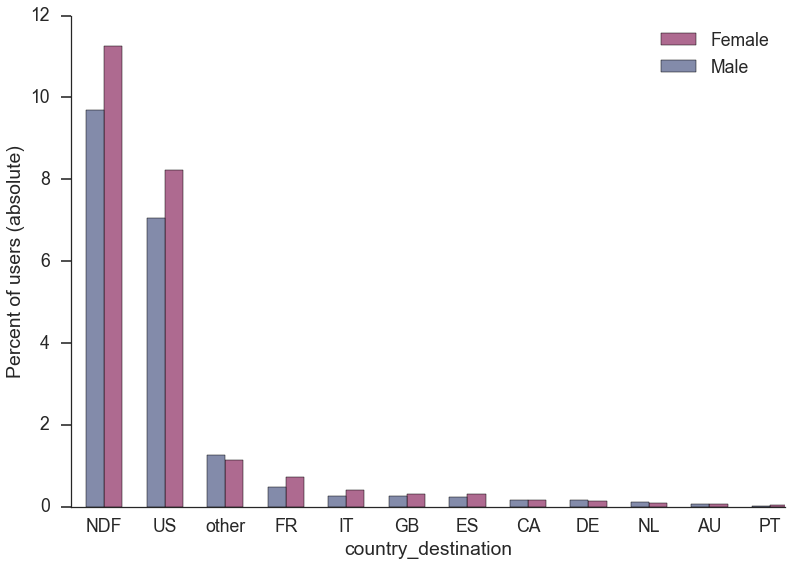

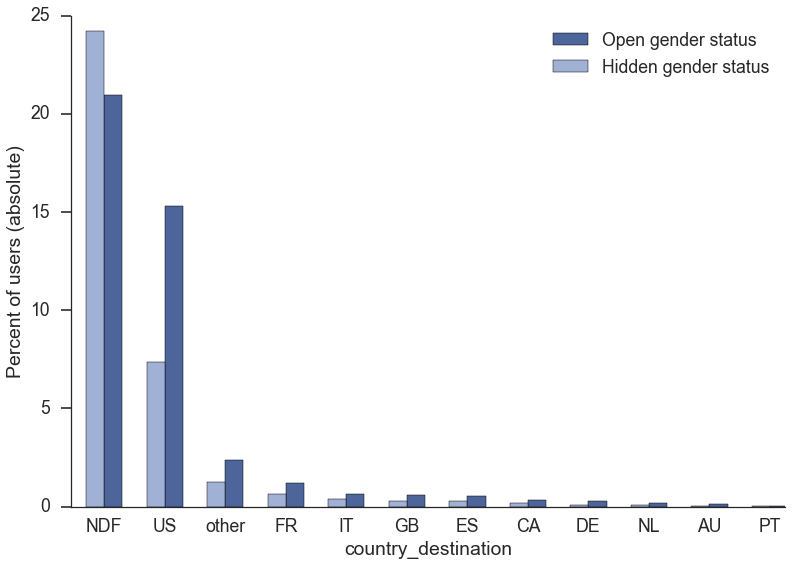

In [19]:
country_user_total = users.shape[0]
country_female = train_users.loc[users['gender'] == 'FEMALE','country_destination'].value_counts(dropna=False)
country_male = train_users.loc[users['gender'] == 'MALE','country_destination'].value_counts(dropna=False)
country_other = train_users.loc[(users['gender'] == 'OTHER') | users['gender'].isnull(),'country_destination'].value_counts(dropna=False)
#country_nan = users.loc[users['gender'].isnull(),'country_destination'].value_counts(dropna=False)

# Bar width
width = 0.3
(country_female / country_user_total * 100).plot(kind='bar', width=width, color='#AE6A90', label='Female', position=0, rot=0)
(country_male / country_user_total * 100).plot(kind='bar', width=width, color='#838BAA', label='Male', position=1, rot=0)
plt.legend()
plt.xlabel('country_destination')
plt.ylabel('Percent of users (absolute)')

sns.despine()
plt.show()

((country_male + country_female) / country_user_total * 100).plot(\
  kind='bar', width=width, color='#4D659B', label='Open gender status', position=0, rot=0)
(country_other / country_user_total * 100).plot(\
  kind='bar', width=width, color='#A1B1D6', label='Hidden gender status', position=1, rot=0)

plt.legend()
plt.xlabel('country_destination')
plt.ylabel('Percent of users (absolute)')

sns.despine()
plt.show()

## KNOWLEDGE
People who **opened** their gender status tend to **book** with Airbnb.

People who **hide** their gender status tend **not to book** "NDF - No destination found"

**-END**

## Relative gender percentage

-- Basic - Python --
('abcd', 786, 2.23, 'john', 70.2)
-- Array slice --
abcd
(786, 2.23, 'john')
(2.23, 'john', 70.2)
(123, 'john', 123, 'john')
(123, 'john', 'abcd', 786, 2.23, 'john')
[1, 3]
[]
-- Dict --
6
6
1
-- String --
this is a city
this
4
-- Convert --
123
'123'
<class 'str'>
123
123
<class 'int'>
123.0
123.0
<class 'float'>
['1', '2', '3']
'2'
-- Class --
x:11 y:A z:AAAA
string012345678910
Find 'city' in the string 'this is a city'... found at index 10
-- Loop --
4 6 3 4 5 6 7 8 9 num reached: 9
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
item reached: 22
Number of ticks since 12:00am, January 1, 1970: 1457604252.6833344
2016-03-10
True
-- Function --
['this', 'is', 'my', 'word']
-- Matrix --
[[1 2]
 [3 4]
 [5 6]]
[[2]
 [4]
 [6]]
[[1 2]]
[[1 2]
 [3 4]]
[[2]
 [4]]


NameError: name 'country_nan' is not defined

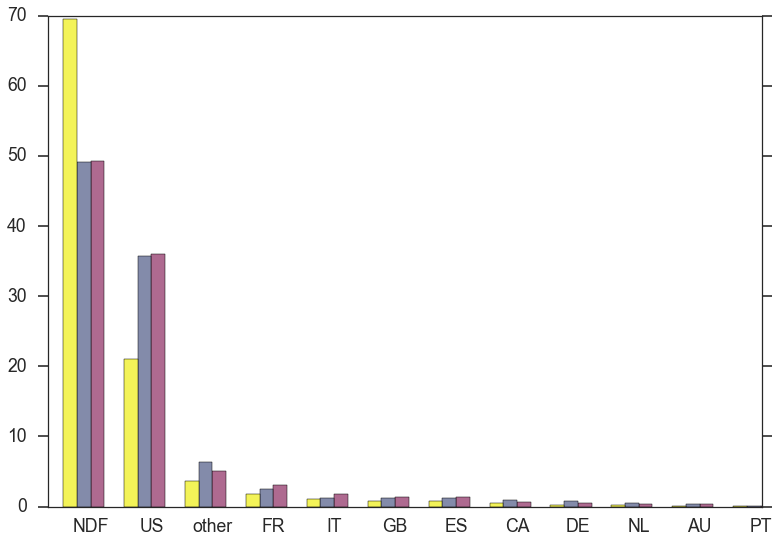

In [20]:
# Bar width
width = 0.225

(country_female / sum(country_female) * 100).plot(kind='bar', width=width, color='#AE6A90', label='Female', position=0, rot=0)
(country_male / sum(country_male) * 100).plot(kind='bar', width=width, color='#838BAA', label='Male', position=1, rot=0)
(country_other / sum(country_other) * 100).plot(kind='bar', width=width, color='#F3F358', label='Other', position=2, rot=0)
(country_nan / sum(country_nan) * 100).plot(kind='bar', width=width, color='#FF3030', label='NaN', position=3, rot=0)

plt.legend()
plt.xlabel('country_destination')
plt.ylabel('Percent of users (relative)')

sns.despine()
plt.show()

## Destination for younger and older

In [ ]:
# int(users['age'].mean()) is 36
age = int(users['age'].mean())

younger = sum(users.loc[users['age'] < age, 'country_destination'].value_counts())
older = sum(users.loc[users['age'] > age, 'country_destination'].value_counts())

younger_destinations = users.loc[users['age'] < age, 'country_destination'].value_counts() / younger * 100
older_destinations = users.loc[users['age'] > age, 'country_destination'].value_counts() / older * 100

younger_destinations.plot(kind='bar', width=width, color='#63EA55', position=0, label='Youngers', rot=0)
older_destinations.plot(kind='bar', width=width, color='#4DD3C9', position=1, label='Olders', rot=0)

plt.legend()
plt.xlabel('country_destination')
plt.ylabel('Percent of users (relative)')

sns.despine()
plt.show()

## KNOWLEDGE
With Airbnb,
**Younger people** trend to go to US, **Older people** trend to go to the other country

**-END**

## ======================== [ language ] ========================

In [ ]:
sns.set_style("white", {'ytick.major.size': 10.0})
sns.set_context("poster", font_scale=1.1)

(users['language'].value_counts(dropna=False) / users.shape[0] * 100).plot(kind='bar', color='#AAAAAA', rot=0)

plt.title('Language percentage')
plt.xlabel('country_destination')
plt.ylabel('Percent of users (relative)')
plt.show()

(users.loc[users['language'] != 'en', 'language'].value_counts(dropna=False) / users.shape[0] * 100).plot(kind='bar', color='#AAAAAA', rot=0)

plt.title('Language percentage (without English)')
plt.xlabel('country_destination')
plt.ylabel('Percent of users (relative)')

plt.show()

In [ ]:
(users['language'] == 'en').value_counts(dropna=False) / users.shape[0] * 100

## KNOWLEDGE
Most people use English (**96%** of Airbnb)

But in some cases, Asian people prefer to use English with the internation site!!

**-END**

## ======================== [ date_account_created ] ========================

In [ ]:
sns.set_style("whitegrid", {'axes.edgecolor': '0'})
sns.set_context("poster", font_scale=1.1)

users['date_account_created'].value_counts().plot(kind='line', linewidth=1, color='#FC010E')
plt.ylabel('Number of users')
plt.show()

## ======================== [ date_first_active ] ========================

In [ ]:
users['date_first_active'].value_counts().plot(kind='line', linewidth=1, color='#01E201')
plt.ylabel('Number of users')
plt.show()

In [ ]:
(users['date_account_created'].value_counts() - users['date_first_active'].value_counts()).plot(kind='line', linewidth=1, color='#000337')
plt.ylabel('Number of users not active after registered')
plt.show()

## KNOWLEDGE
Airbnb grow a lot every years
**date_account_created** and **date_first_active** OR **timestamp_first_active** are not much different

**-END**

## ============== [ date_first booking vs. date_first_active ] ==============

In [ ]:
users['date_first_active'].value_counts().plot(kind='line', linewidth=1, color='#01E201')
users['date_first_booking'].value_counts().plot(kind='line', linewidth=1, color='#0029BF')

plt.legend()
plt.ylabel('Number of users')
plt.show()

**So, some different peak happends in between 2014 and 2015**

Let's see the result from **train_users** and **test_users** differently.

In [ ]:
train_users['date_first_active'].value_counts().plot(kind='line', linewidth=1, color='#01E201', label='date_first_active_train')
train_users['date_first_booking'].value_counts().plot(kind='line', linewidth=1, color='#0029BF', label='date_first_booking_train')
test_users['date_first_active'].value_counts().plot(kind='line', linewidth=1, color='#BB0101', label='date_first_active_test')

plt.legend()
plt.ylabel('Number of users')
plt.show()

*The **test data** is in the red portion*

### Take a look closer each year
Plot 2010-2012 together, and 2013-2014 on another chart.

In [ ]:
from pandas.tseries.offsets import *

# Year 2010
users_2010 = users.loc[
    (users['date_first_active'] >= pd.to_datetime(20100101, format='%Y%m%d')) &
    (users['date_first_active'] < pd.to_datetime(20110101, format='%Y%m%d')), 'date_first_active']
users_2010.value_counts().plot(kind='line', linewidth=2, color='#FF0700', label='2010')

# Year 2011
users_2011 = users.loc[
    (users['date_first_active'] >= pd.to_datetime(20110101, format='%Y%m%d')) &
    (users['date_first_active'] < pd.to_datetime(20120101, format='%Y%m%d')), 'date_first_active']
(users_2011 - DateOffset(years=1)).value_counts().plot(kind='line', linewidth=2, color='#FFD600', label='2011')

# Year 2012
users_2012 = users.loc[
    (users['date_first_active'] >= pd.to_datetime(20120101, format='%Y%m%d')) &
    (users['date_first_active'] < pd.to_datetime(20130101, format='%Y%m%d')), 'date_first_active']
(users_2012 - DateOffset(years=2)).value_counts().plot(kind='line', linewidth=2, color='#4FF200', label='2012')

plt.title('Active users for 2010-2012')
plt.legend()
plt.show()

# Year 2013
users_2013 = users.loc[
    (users['date_first_active'] >= pd.to_datetime(20130101, format='%Y%m%d')) &
    (users['date_first_active'] < pd.to_datetime(20140101, format='%Y%m%d')), 'date_first_active']
(users_2013 - DateOffset(years=3)).value_counts().plot(kind='line', linewidth=2, color='#07A0DB', label='2013')

# Year 2014
users_2014 = users.loc[
    (users['date_first_active'] >= pd.to_datetime(20140101, format='%Y%m%d')) &
    (users['date_first_active'] < pd.to_datetime(20150101, format='%Y%m%d')), 'date_first_active']
(users_2014 - DateOffset(years=4)).value_counts().plot(kind='line', linewidth=2, color='#5012E0', label='2014')

plt.title('Active users for 2013-2014')
plt.legend()
plt.show()

## KNOWLEDGE
We might guess, Airbnb push their marketing during the middle of every years.

**-END**

And there are also small peaks with the same distance.

Let's see it by week.

In [ ]:
active_weekdays = users['date_first_active'].apply(lambda x: x.weekday())
book_weekdays = users['date_first_booking'].apply(lambda x: x.weekday())

width=0.2
active_weekdays.value_counts().sort_index().plot(kind='bar', width=width, color='#00A2B1', label='date_first_active', position=0, rot=0)
book_weekdays.value_counts().sort_index().plot(kind='bar', width=width, color='#007984', label='date_first_booking', position=1, rot=0)

plt.legend()
plt.xlabel('Week Day')

sns.despine()
plt.show()

0 = Monday
1 = Tuesday
2 = Wednesday
3 = Thursday
4 = Friday
5 = Saturday
6 = Sunday

## KNOWLEDGE
People highly use Airbnb on weekdays rather than weekend

And highest on **Tuesday**

**-END**